# CLUSTERING ANALYSIS

## Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

### Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.
### Datasets :
Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset
### Implementing Clustering Algorithms:
•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

### Cluster Analysis and Interpretation:
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

### Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques.
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.
Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


### Data Preprocessing:

+ Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
+ Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
+ Use multiple visualizations to understand the hidden patterns in the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('EastWestAirlines.csv')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
# Examine the data
data.shape

(3999, 12)

In [4]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

###### No Missing values
###### Using IQR Method to deal with outliers

In [8]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
import numpy as np
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [10]:
data_clean = remove_outliers_iqr(data.select_dtypes(include=[np.number]))

In [11]:
data_clean.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0


In [12]:
data_final = pd.concat([data_clean, data[data.select_dtypes(exclude=[np.number]).columns]], axis=1)

In [13]:
data_final.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1.0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0
1,2.0,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0
2,3.0,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0
3,4.0,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0
5,6.0,16420.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6942.0,0.0


###### Feature scaling is necessary for distance-based algorithms so feature scaling is necessary here.
To deal with  K-Means & hierarchical algorithms, we implement Standardization.
Later DBSCAN algorithms, we implement Normalization.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_clean), columns=data_clean.columns)

In [15]:
data_scaled

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.834643,-0.438859,0.0,-0.719055,0.0,0.0,-0.783131,-1.081732,-0.378837,-0.409708,1.503693,-0.623072
1,-1.833775,-0.647735,0.0,-0.719055,0.0,0.0,-0.780130,-0.952735,-0.378837,-0.409708,1.488035,-0.623072
2,-1.832907,-0.128773,0.0,-0.719055,0.0,0.0,-0.494075,-0.694742,-0.378837,-0.409708,1.520330,-0.623072
3,-1.832038,-0.752607,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,-0.378837,-0.409708,1.480206,-0.623072
4,-1.830302,-0.714019,0.0,-0.719055,0.0,0.0,-0.795867,-1.210728,-0.378837,-0.409708,1.475312,-0.623072
...,...,...,...,...,...,...,...,...,...,...,...,...
2870,1.652614,-0.665761,0.0,-0.719055,0.0,0.0,-0.171862,-0.694742,0.948432,1.653181,-1.235018,1.604952
2871,1.653482,0.411806,0.0,-0.719055,0.0,0.0,-0.724061,-0.565745,-0.378837,-0.409708,-1.238933,1.604952
2872,1.654350,0.628028,0.0,1.013789,0.0,0.0,1.066780,-0.178756,-0.378837,-0.409708,-1.235507,1.604952
2873,1.655219,0.189152,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,2.939335,1.653181,-1.235997,-0.623072


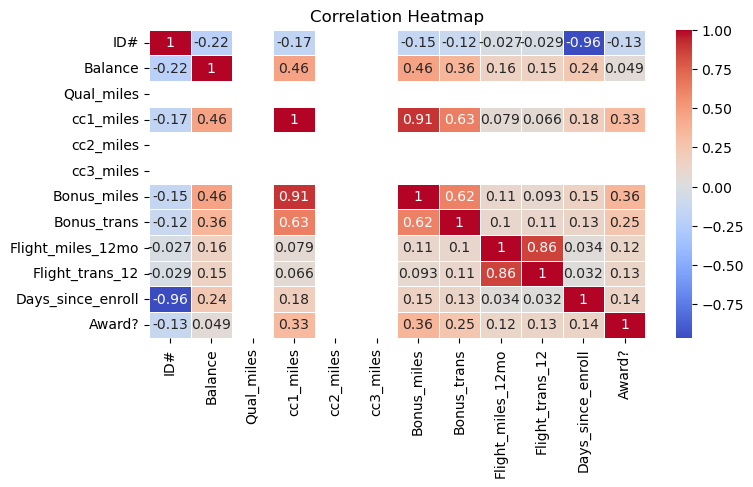

In [16]:
plt.figure(figsize=(8,4))
sns.heatmap(data_scaled.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

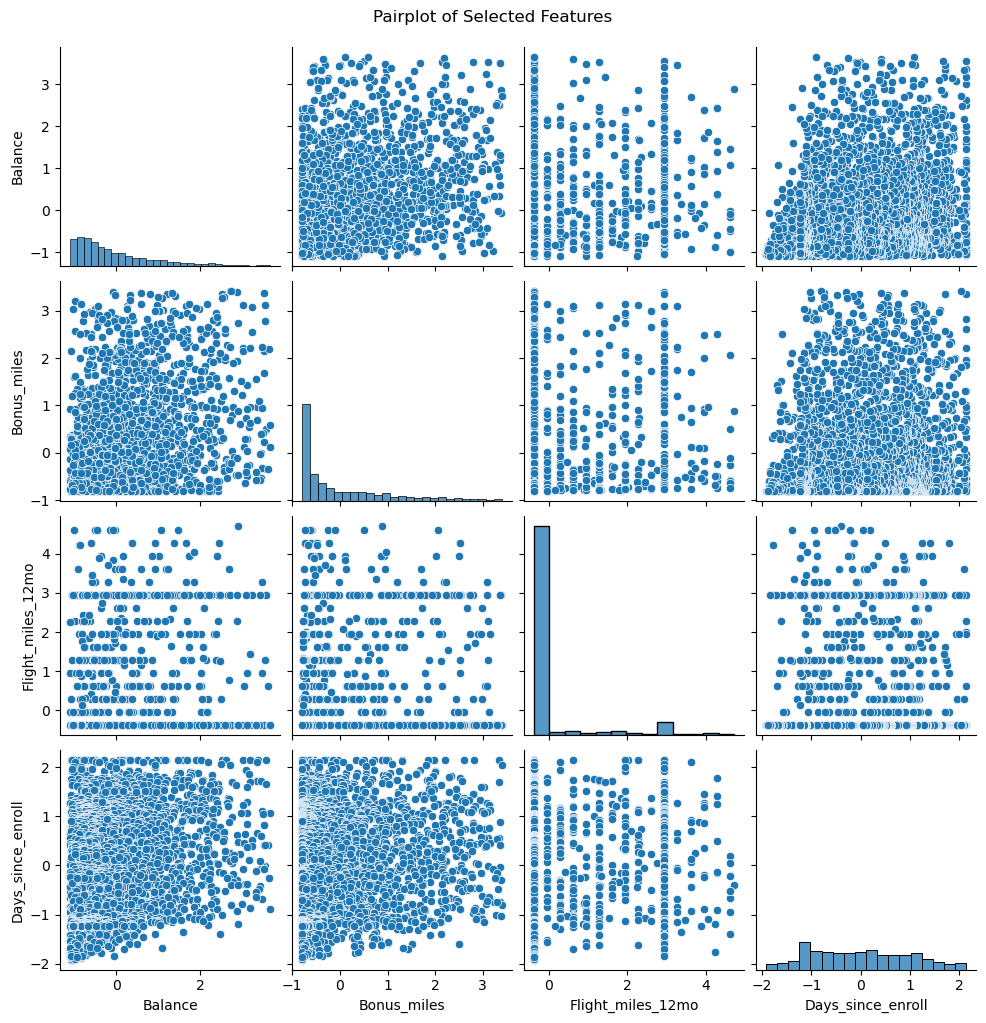

In [17]:
# Pairplot for Visualizing Feature Clusters
selected_features = ['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'Days_since_enroll']
sns.pairplot(data_scaled[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


### Implementing Clustering Algorithms:

+ Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB. 
+ Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data. 
+ Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

##### K-Means

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
data_scaled['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

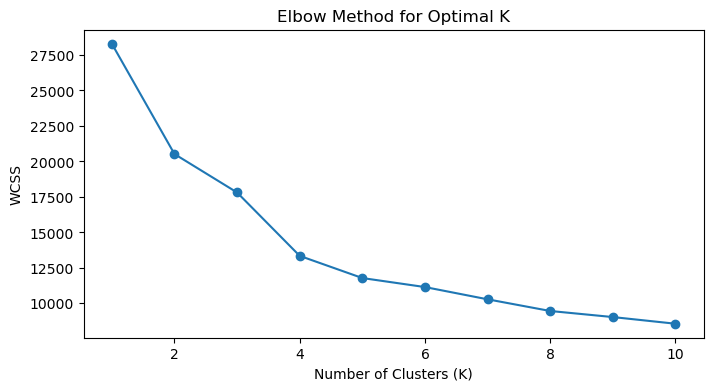

In [19]:
# Elbow method to find optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

#####  Hierarchical

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linked = linkage(data_scaled.drop(columns=['KMeans_Cluster']), method='ward')
clusters_hierarchical = fcluster(linked, t=4, criterion='maxclust')
data_scaled['Hierarchical_Cluster'] = clusters_hierarchical

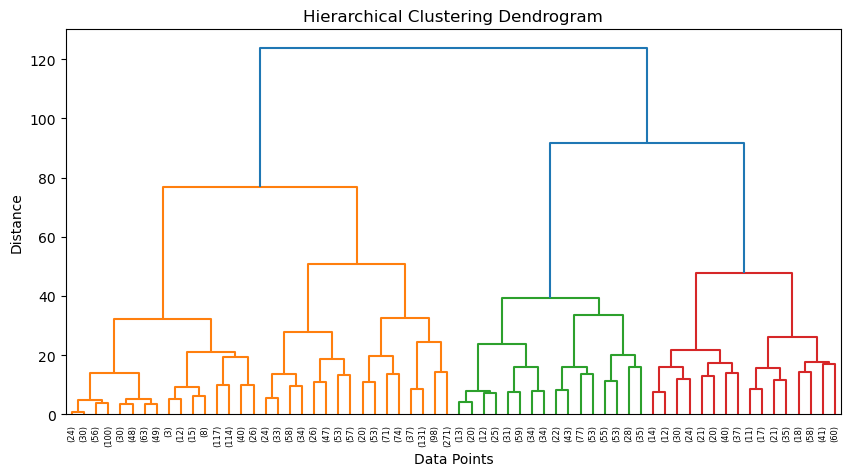

In [21]:
# Dendrogram to visualize linkage
linked = linkage(data_scaled.drop(['KMeans_Cluster'], axis=1), method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

##### DBSCAN

In [22]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
data_normalized = pd.DataFrame(scaler_minmax.fit_transform(data_clean), columns=data_clean.columns)

In [23]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(data_normalized)

### Cluster Analysis and Interpretation:
• Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

+ The K-Means clustering suggests multiple clusters, possibly visualized with "Bonus_miles" and "Balance" as features. Based on the Elbow Method, the optimal number of clusters can be identified where the WCSS curve starts to flatten, suggesting diminishing returns for adding more clusters.The Elbow Method graph indicates that the optimal number of clusters is likely around 3 or 4, where the WCSS begins to plateau. This means increasing clusters beyond this point doesn't significantly improve clustering performance.

+ Hierarchical clustering, represented by the dendrogram, provides a visual representation of how clusters are merged or split. The optimal number of clusters is usually identified by looking for the longest vertical distance that doesn't cross any horizontal line (cutting the dendrogram at this point).

+ DBSCAN is density-based clustering, which is effective in identifying outliers and clusters of varying shapes. The presence of silhouette scores indicates an attempt to evaluate clustering performance. If multiple clusters were detected, it suggests that DBSCAN successfully identified dense regions of data.

### Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques. Plot the clusters with different colours to visualize the separation of data points belonging to different clusters. Evaluation and Performance Metrics: Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

##### K-Means

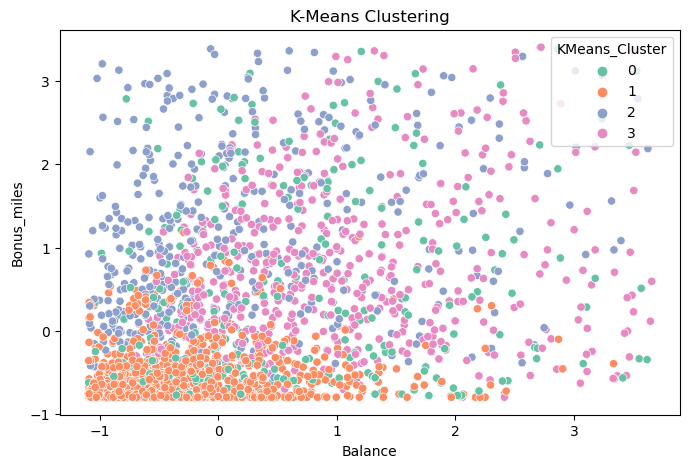

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data_scaled, x='Balance', y='Bonus_miles', hue='KMeans_Cluster', palette='Set2')
plt.title('K-Means Clustering')
plt.show()

In [25]:
from sklearn.metrics import silhouette_score
kmeans_score = silhouette_score(data_scaled.drop(['KMeans_Cluster'], axis=1), data_scaled['KMeans_Cluster'])
print(f'Silhouette Score for K-Means: {kmeans_score:.2f}')

Silhouette Score for K-Means: 0.28


#####  Hierarchical

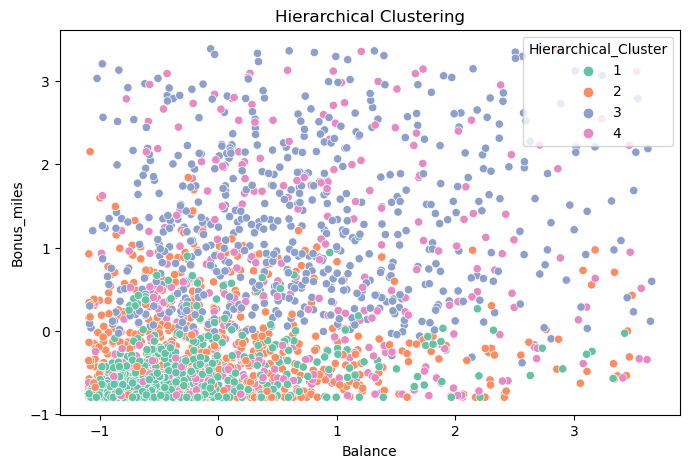

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data_scaled, x='Balance', y='Bonus_miles', hue='Hierarchical_Cluster', palette='Set2')
plt.title('Hierarchical Clustering')
plt.show()

In [27]:
hierarchical_score = silhouette_score(data_scaled.drop(['KMeans_Cluster', 'Hierarchical_Cluster'], axis=1), data_scaled['Hierarchical_Cluster'])
print(f'Silhouette Score for Hierarchical Clustering: {hierarchical_score:.2f}')

Silhouette Score for Hierarchical Clustering: 0.21


##### DBSCAN

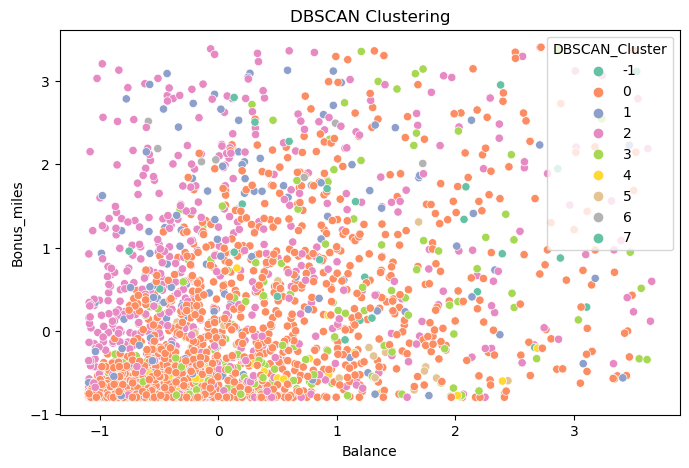

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data_scaled, x='Balance', y='Bonus_miles', hue='DBSCAN_Cluster', palette='Set2')
plt.title('DBSCAN Clustering')
plt.show()

In [29]:
if data_scaled['DBSCAN_Cluster'].nunique() > 1:
    features = data_scaled.drop(['KMeans_Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster'], axis=1)
    score = silhouette_score(features, data_scaled['DBSCAN_Cluster'])
    print(f'Silhouette Score for DBSCAN: {score:.2f}')
else:
    print('DBSCAN did not form distinct clusters.')


Silhouette Score for DBSCAN: 0.22
